# Go wild -- this assignment is to recognize Cats and Dogs. The load dataset function is loading the data properly.
# Note that the image are in color, i.e., different from the MNIST and Fashion image. The tensors will be different
# The rest is yours. Here are a few suggestions

# 1. Start with a basic model -- that is your baseline
# 2. Move a convolutional network
# 3. Finish with a convolutional network with data augmentation (see the video)

In [2]:
# USE ONLY IF using a GPU on PACE

# If this is not imported the GPU on the PACE will not function properly
# otherwise, on another system, it will need built with cuda and loaded 
# the same version to work properly
# os.system("module load cuda/12.1.1")
import os
import time
os.system("module load cuda/12.1.1")
time.sleep(20)

In [3]:
from tensorflow import keras
from keras import layers
from keras.datasets import imdb
import numpy as np
import os, shutil, pathlib
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import array_to_img
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
size_picture = 128

In [4]:
from keras.utils import image_dataset_from_directory

In [5]:
def tensor_from_image(name):
    img = load_img(name)
    img = img.resize((size_picture,size_picture))
    return (img,img_to_array(img).astype("uint8").reshape((size_picture,size_picture,3)))  

In [6]:
def load_dataset(start_index, end_index, dataset_type):
    images = []
    total_images = 2 * (end_index - start_index + 1)  # 2x for cats + dogs
    tensor_inputs = np.zeros((total_images, size_picture, size_picture, 3))
    tensor_labels = np.zeros((total_images, 1))
    
    #  Handle folder name differences (test_set uses plural)
    category_folder = {
        "cat": "cats" if dataset_type == "test_set" else "cat",
        "dog": "dogs" if dataset_type == "test_set" else "dog"
    }
    
    base_directory = pathlib.Path(f'../datasets/cats_and_dogs/{dataset_type}')
    k = 0  # Track loaded images
    
    for category in {"cat", "dog"}:
        folder = category_folder[category]
        names = [f"{category}.{i}.jpg" for i in range(start_index, end_index + 1)]
        
        for n in names:
            fname = base_directory / folder / n


            # **Check if file exists before loading**
            if not fname.exists():
                print(f"Warning: Missing file {fname}")  # Print a warning but don't crash
                continue  # Skip this file


            img, t = tensor_from_image(fname)  #  Assumes file exists
            images.append(img)
            tensor_inputs[k] = t
            tensor_labels[k] = (category == 'dog')  # 1 for dog, 0 for cat
            k += 1
    
    return images, tensor_inputs[:k], tensor_labels[:k]

# Training data (1-4000 from training_set)
training_images, training_inputs, training_labels = load_dataset(1, 4000, "training_set")

# Testing data (4001-5000 from test_set)
testing_images, testing_inputs, testing_labels = load_dataset(4001, 5000, "test_set")



In [6]:
# def binary_classify(model,inputs,outputs):
#   model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])
#   model.fit(inputs,outputs,epochs=10)
from keras.callbacks import EarlyStopping

def binary_classify(model, inputs, outputs, epochs=10):
    # early_stopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["binary_accuracy"])
    # model.fit(inputs, outputs, epochs=epochs, batch_size=32, callbacks=[early_stopping])
    model.fit(inputs, outputs, epochs=epochs, batch_size=32)



In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model_basic = Sequential([
    Flatten(input_shape=(size_picture, size_picture, 3)),  # Flattening for dense input
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary classification
])



binary_classify(model_basic, training_inputs, training_labels)



Epoch 1/10
250/250 [==============================] - 17s 45ms/step - loss: 326.0708 - binary_accuracy: 0.4975
Epoch 2/10
250/250 [==============================] - 11s 42ms/step - loss: 11.3693 - binary_accuracy: 0.4846
Epoch 3/10
250/250 [==============================] - 10s 41ms/step - loss: 5.6541 - binary_accuracy: 0.4920
Epoch 4/10
250/250 [==============================] - 9s 37ms/step - loss: 0.9336 - binary_accuracy: 0.5048
Epoch 5/10
250/250 [==============================] - 10s 39ms/step - loss: 0.6932 - binary_accuracy: 0.4933
Epoch 6/10
250/250 [==============================] - 9s 37ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 7/10
250/250 [==============================] - 9s 37ms/step - loss: 0.6932 - binary_accuracy: 0.4958
Epoch 8/10
250/250 [==============================] - 10s 38ms/step - loss: 0.6932 - binary_accuracy: 0.4882
Epoch 9/10
250/250 [==============================] - 10s 38ms/step - loss: 0.6932 - binary_accuracy: 0.4960
Epoch 10/10
250/250

In [8]:
model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 64)                3145792   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,147,905
Trainable params: 3,147,905
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.layers import Conv2D, MaxPooling2D

model_cnn = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(size_picture, size_picture, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation="relu"),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

binary_classify(model_cnn, training_inputs, training_labels)



Epoch 1/10
250/250 [==============================] - 72s 270ms/step - loss: 9.1410 - binary_accuracy: 0.5347
Epoch 2/10
250/250 [==============================] - 67s 267ms/step - loss: 0.8493 - binary_accuracy: 0.5872
Epoch 3/10
250/250 [==============================] - 66s 264ms/step - loss: 0.5877 - binary_accuracy: 0.7104
Epoch 4/10
250/250 [==============================] - 67s 267ms/step - loss: 0.4979 - binary_accuracy: 0.7793
Epoch 5/10
250/250 [==============================] - 67s 266ms/step - loss: 0.3696 - binary_accuracy: 0.8405
Epoch 6/10
250/250 [==============================] - 67s 268ms/step - loss: 0.2425 - binary_accuracy: 0.9019
Epoch 7/10
250/250 [==============================] - 66s 265ms/step - loss: 0.1574 - binary_accuracy: 0.9451
Epoch 8/10
250/250 [==============================] - 68s 271ms/step - loss: 0.1151 - binary_accuracy: 0.9620
Epoch 9/10
250/250 [==============================] - 68s 273ms/step - loss: 0.0892 - binary_accuracy: 0.9753
Epoch 10/1

In [10]:
len(training_images)

8000

In [11]:
len(testing_images)

2000

In [12]:
training_inputs.shape

(8000, 128, 128, 3)

In [13]:
testing_inputs.shape

(2000, 128, 128, 3)

In [14]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                6422592   
          

In [15]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Augmentation Layers
datagen = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

# Input Layer
input = keras.Input(shape=(size_picture, size_picture, 3), name="data")
x = datagen(input)
x = layers.Rescaling(1/255.0)(x)  # Normalize pixel values

# Convolutional Layers
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)

# Fully Connected Layers
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

# Build Model
model_augmented = Model(inputs=input, outputs=output)

# Compile & Train
model_augmented.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["binary_accuracy"])
model_augmented.fit(training_inputs, training_labels, epochs=10, batch_size=32)


Epoch 1/10
250/250 [==============================] - 96s 342ms/step - loss: 0.6976 - binary_accuracy: 0.5684
Epoch 2/10
250/250 [==============================] - 83s 333ms/step - loss: 0.6248 - binary_accuracy: 0.6584
Epoch 3/10
250/250 [==============================] - 80s 319ms/step - loss: 0.6041 - binary_accuracy: 0.6819
Epoch 4/10
250/250 [==============================] - 80s 321ms/step - loss: 0.5751 - binary_accuracy: 0.7074
Epoch 5/10
250/250 [==============================] - 82s 329ms/step - loss: 0.5551 - binary_accuracy: 0.7246
Epoch 6/10
250/250 [==============================] - 83s 331ms/step - loss: 0.5432 - binary_accuracy: 0.7285
Epoch 7/10
250/250 [==============================] - 83s 331ms/step - loss: 0.5162 - binary_accuracy: 0.7501
Epoch 8/10
250/250 [==============================] - 82s 329ms/step - loss: 0.5032 - binary_accuracy: 0.7585
Epoch 9/10
250/250 [==============================] - 83s 331ms/step - loss: 0.4945 - binary_accuracy: 0.7624
Epoch 10/1

In [16]:
model_augmented.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data (InputLayer)           [(None, 128, 128, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                             

In [17]:
# Evaluate models
test_loss_basic, test_acc_basic = model_basic.evaluate(testing_inputs, testing_labels)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(testing_inputs, testing_labels)
test_loss_aug, test_acc_aug = model_augmented.evaluate(testing_inputs, testing_labels)


63/63 [==============================] - 8s 106ms/step - loss: 0.5478 - binary_accuracy: 0.7670


63/63 [==============================] - 5s 84ms/step


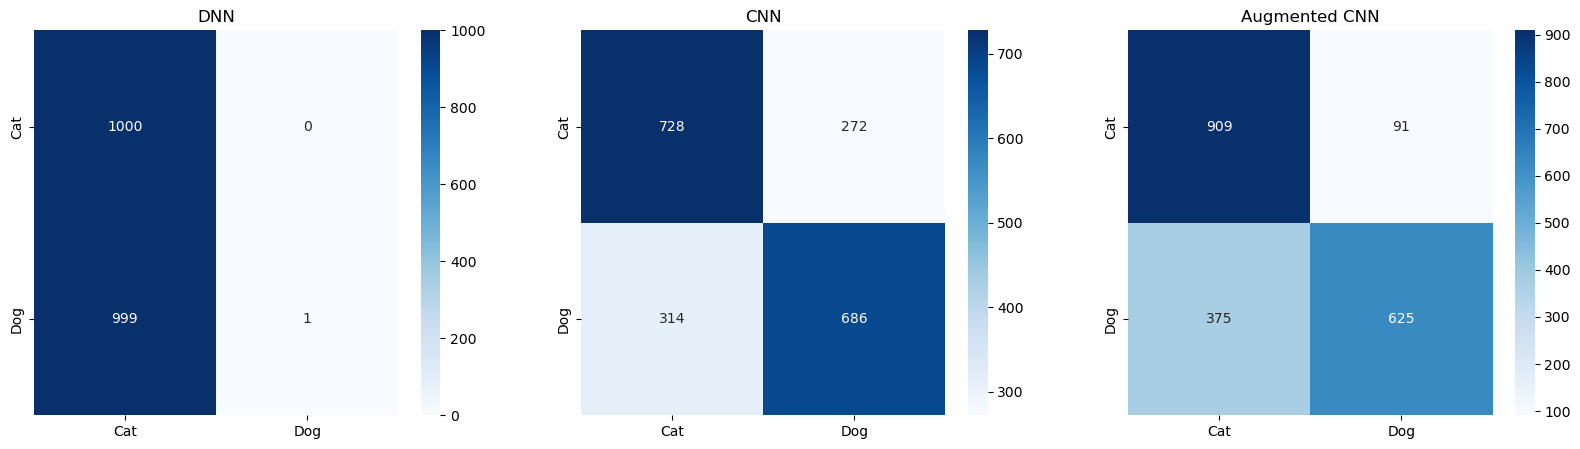

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predictions
pred_basic = (model_basic.predict(testing_inputs) > 0.5).astype("int32")
pred_cnn = (model_cnn.predict(testing_inputs) > 0.5).astype("int32")
pred_aug = (model_augmented.predict(testing_inputs) > 0.5).astype("int32")
# pred_lstm = (model_lstm.predict(testing_inputs.reshape(testing_inputs.shape[0], size_picture, size_picture * 3)) > 0.5).astype("int32")

# Confusion Matrices
cms = {
    "DNN": confusion_matrix(testing_labels, pred_basic),
    "CNN": confusion_matrix(testing_labels, pred_cnn),
    "Augmented CNN": confusion_matrix(testing_labels, pred_aug)
    # "RNN (LSTM)": confusion_matrix(testing_labels, pred_lstm)
}

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20,5))
for ax, (model_name, cm) in zip(axes, cms.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"], ax=ax)
    ax.set_title(f"{model_name}")

plt.show()

In [19]:
from sklearn.metrics import classification_report
print("Classification Report - Augmented CNN")
print(classification_report(testing_labels, pred_aug, target_names=["Cat", "Dog"]))

# print("Classification Report - LSTM Model")
# print(classification_report(testing_labels, pred_lstm, target_names=["Cat", "Dog"]))

Classification Report - Augmented CNN
              precision    recall  f1-score   support

         Cat       0.71      0.91      0.80      1000
         Dog       0.87      0.62      0.73      1000

    accuracy                           0.77      2000
   macro avg       0.79      0.77      0.76      2000
weighted avg       0.79      0.77      0.76      2000



63/63 [==============================] - 5s 76ms/step - loss: 0.5478 - binary_accuracy: 0.7670


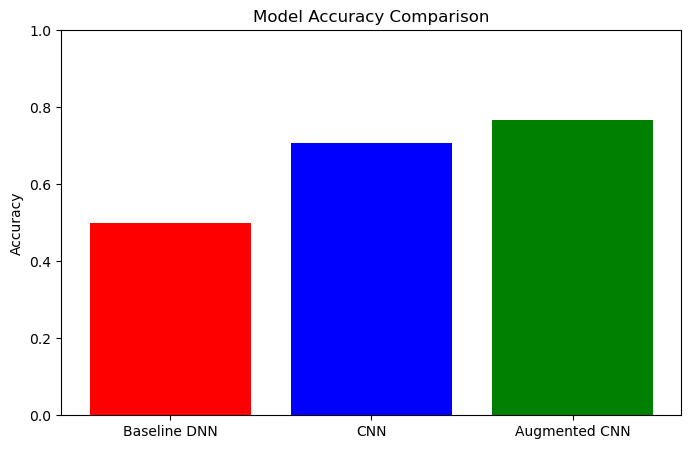

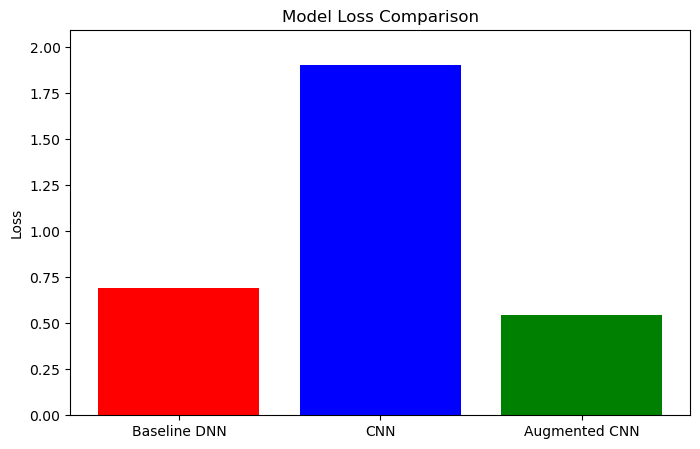

In [20]:
import matplotlib.pyplot as plt
# Evaluate each model and store results
test_loss_basic, test_acc_basic = model_basic.evaluate(testing_inputs, testing_labels)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(testing_inputs, testing_labels)
test_loss_aug, test_acc_aug = model_augmented.evaluate(testing_inputs, testing_labels)
# test_loss_lstm, test_acc_lstm = model_lstm.evaluate(testing_inputs.reshape(testing_inputs.shape[0], size_picture, size_picture * 3), testing_labels)

# Store model names and results
models = ["Baseline DNN", "CNN", "Augmented CNN"]
accuracies = [test_acc_basic, test_acc_cnn, test_acc_aug]
losses = [test_loss_basic, test_loss_cnn, test_loss_aug]

# Accuracy Bar Graph
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=["red", "blue", "green"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Loss Bar Graph
plt.figure(figsize=(8,5))
plt.bar(models, losses, color=["red", "blue", "green"])
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.ylim(0, max(losses) * 1.1)  # Adjust scale dynamically based on loss values
plt.show()

In [25]:
# # Classification Report
# from sklearn.metrics import classification_report
# print(classification_report(testing_labels, predictions, target_names=["Cat", "Dog"]))
predictions = model_augmented.predict(testing_inputs) 


63/63 [==============================] - 6s 98ms/step


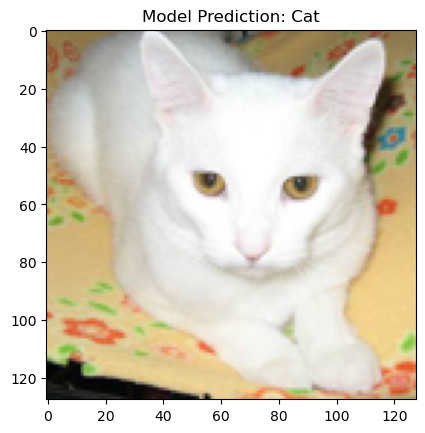

In [62]:
# Sample Predictions on Random Test Image
sample_index = np.random.randint(0, len(testing_inputs))
plt.imshow(testing_inputs[sample_index] / 255.0)  # Normalize for visualization
plt.title(f"Model Prediction: {'Dog' if predictions[sample_index][0] == 1 else 'Cat'}")
plt.show()

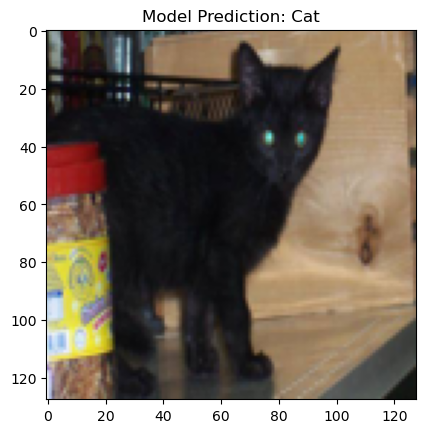

In [65]:
# Sample Predictions on Random Test Image
sample_index = np.random.randint(0, len(testing_inputs))
plt.imshow(testing_inputs[sample_index] / 255.0)  # Normalize for visualization
plt.title(f"Model Prediction: {'Dog' if predictions[sample_index][0] == 1 else 'Cat'}")
plt.show()

63/63 [==============================] - 6s 96ms/step


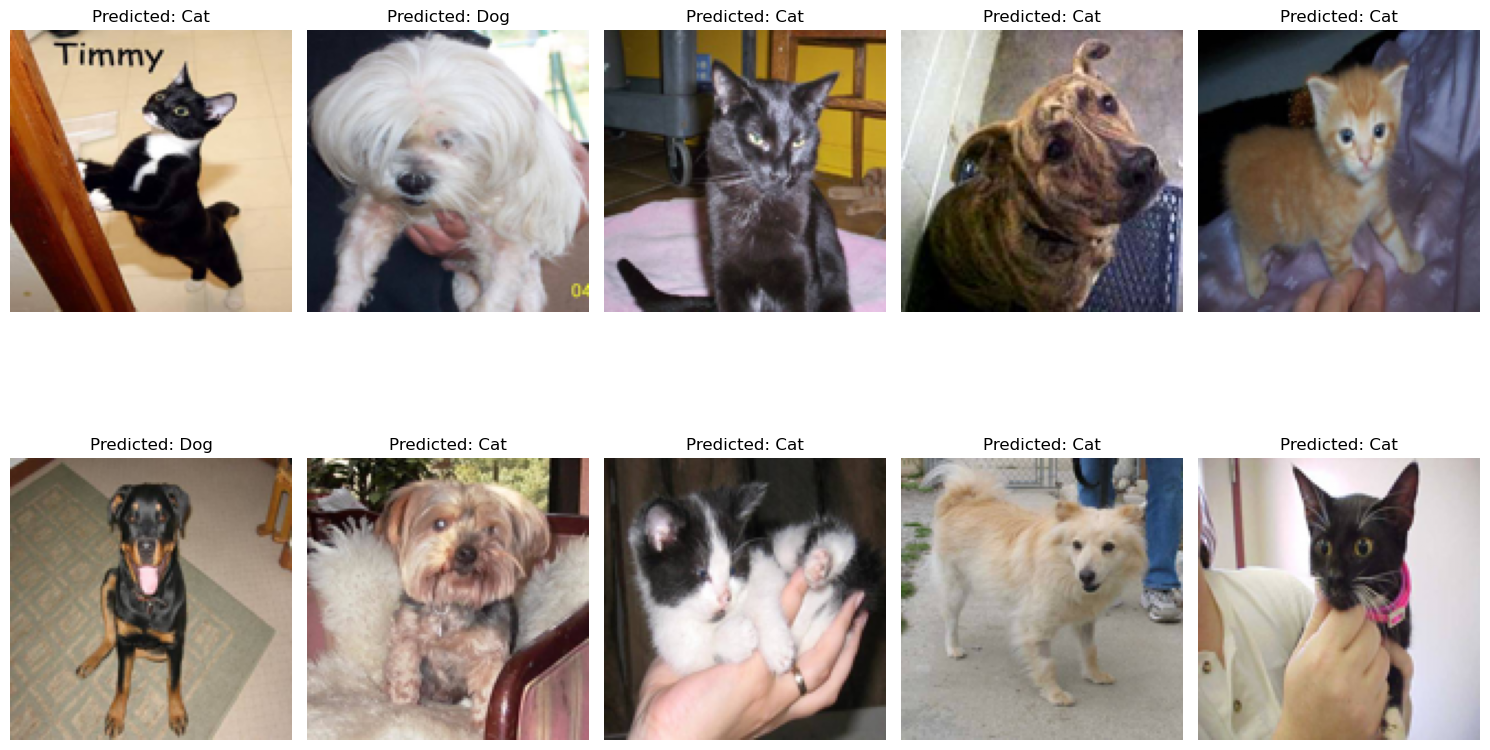

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select 10 random indices
sample_indices = np.random.randint(0, len(testing_inputs), size=10)

# Generate predictions (assuming `predictions = model.predict(testing_inputs)`)
# predictions = model_augmented.predict(testing_inputs)  # Ensure predictions exist

# Plot 10 images
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)  # Create 2 rows, 5 columns
    plt.imshow(testing_inputs[idx] / 255.0)  # Normalize for display
    plt.title(f"Predicted: {'Dog' if predictions[idx][0] >= 0.5 else 'Cat'}")
    plt.axis("off")  # Hide axes for cleaner visualization

plt.tight_layout()  # Optimize spacing
plt.show()

In [67]:
# Generate predictions
# predictions = model_augmented.predict(testing_inputs)

# Convert predictions to binary labels (threshold at 0.5 for classification)
predicted_labels = (predictions >= 0.5).astype(int)

# Count misclassified images
num_incorrect = np.sum(predicted_labels.flatten() != testing_labels.flatten())

# Output the result
print(f"Number of incorrectly predicted test images: {num_incorrect} out of {len(testing_inputs)}")

Number of incorrectly predicted test images: 466 out of 2000


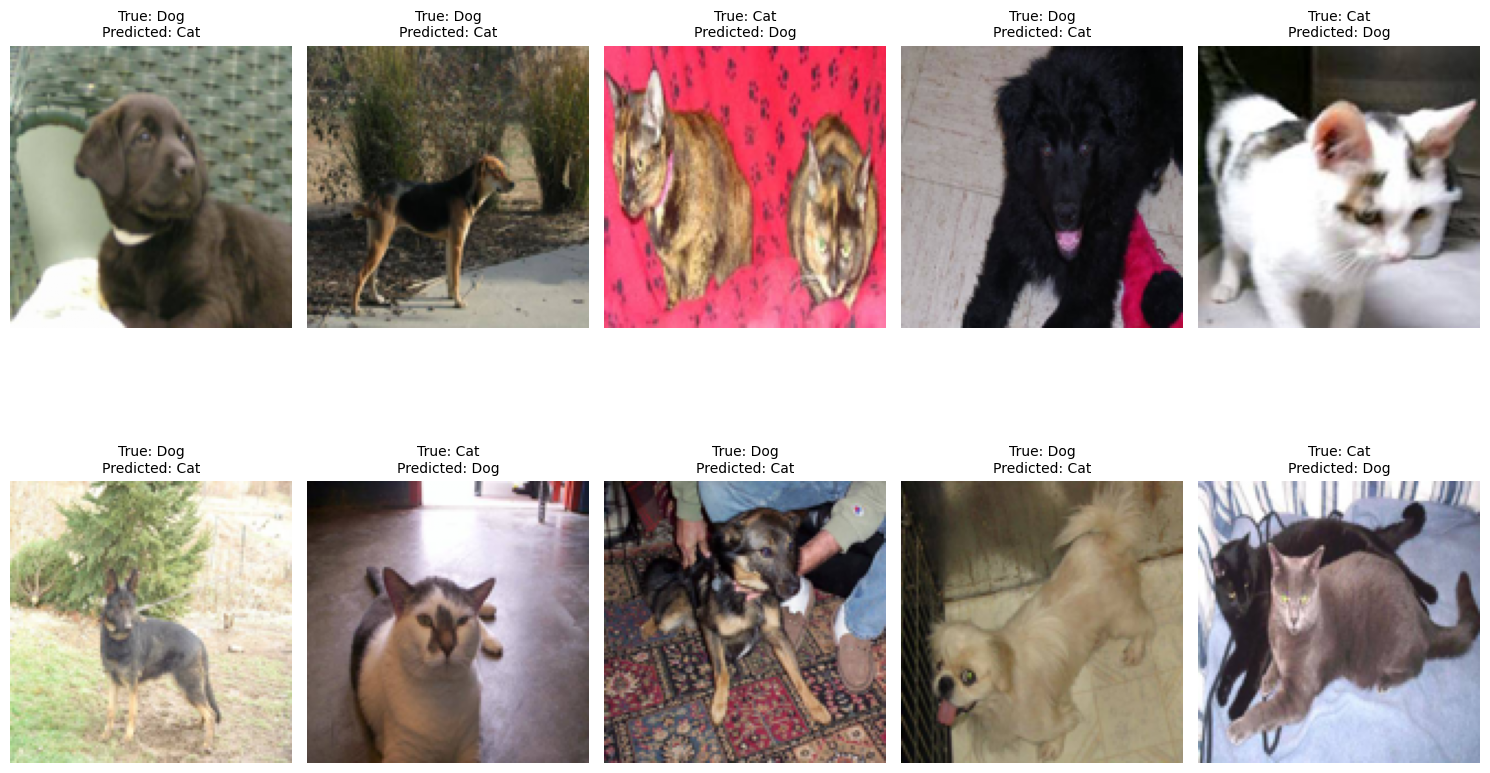

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions
# predictions = model_augmented.predict(testing_inputs)

# Convert predictions to binary labels
predicted_labels = (predictions >= 0.5).astype(int)

# Find misclassified indices
misclassified_indices = np.where(predicted_labels.flatten() != testing_labels.flatten())[0]

# Select 10 random misclassified images (if there are at least 10)
num_to_plot = min(10, len(misclassified_indices))
selected_indices = np.random.choice(misclassified_indices, size=num_to_plot, replace=False)

# Plot misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(selected_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(testing_inputs[idx] / 255.0)  # Normalize for visualization
    true_label = "Dog" if testing_labels[idx][0] == 1 else "Cat"
    predicted_label = "Dog" if predicted_labels[idx][0] == 1 else "Cat"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", fontsize=10)
    plt.axis("off")  # Hide axis for clarity

plt.tight_layout()
plt.show()